# K-Means

## Importing Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg

## Functions for algorithms

In [36]:
def initCentroids(data, k):
    n = data.shape[0]
    ind = np.random.randint(0, n, k)
    centroids = []
    for i in ind:
        centroids.append(data[i])
    return np.array(centroids)

def assignClusters(data, centroids):
    n = data.shape[0]
    y = []
    for i in range(n):
        dist = np.sqrt(np.sum(np.square(centroids - data[i]),axis = 1))
        label = np.argmin(dist)
        y.append(label)
    return y

def estimateCentroids(data, k, y):
    centroids = []
    for i in range(k):
        c = []
        for j in range(data.shape[0]):
            if y[j] == i:
                c.append(data[j])
        c = np.mean(c, axis = 0)
        centroids.append(c)
    return np.array(centroids)

## Clustering the pixels of an image

### Importing image

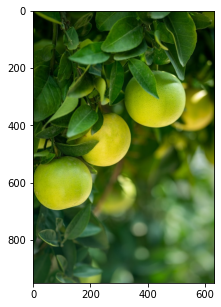

In [40]:
img = pimg.imread('Image.jpeg') / 255.0

plt.figure(figsize = (5, 5))
plt.imshow(img)
plt.show()

### Clustering pixels

In [37]:
def clusterData(data, k, N):
    # Initializing centroids
    centroids = initCentroids(data, k)
    for i in range(N):
        print("Iteration -",i)
        y = assignClusters(data,centroids)
        centroids = estimateCentroids(data,k,y)
    
    y = assignClusters(data,centroids)
    data_new = []
    for i in range(data.shape[0]):
        data_new.append(centroids[y[i]])
    
    return np.array(data_new)

In [41]:
# No.of Clusters
K = 2

# Clustered Data
data = img.reshape(-1,3)
newData = clusterData(data,K,20)
newImg = newData.reshape(img.shape)

Iteration - 0
Iteration - 1
Iteration - 2
Iteration - 3
Iteration - 4
Iteration - 5
Iteration - 6
Iteration - 7
Iteration - 8
Iteration - 9
Iteration - 10
Iteration - 11
Iteration - 12
Iteration - 13
Iteration - 14
Iteration - 15
Iteration - 16
Iteration - 17
Iteration - 18
Iteration - 19


### Plotting images

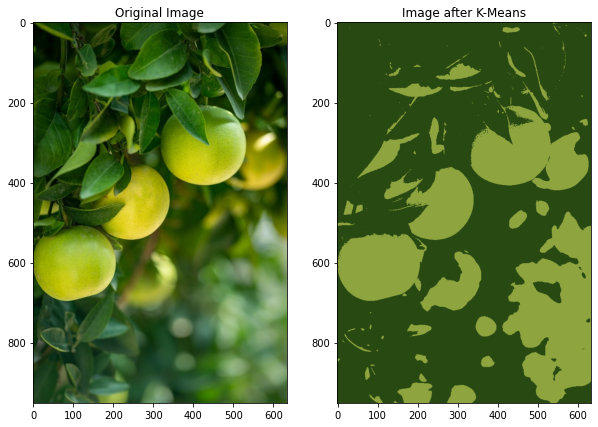

In [42]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Image after K-Means")
plt.imshow(newImg)
plt.show()